# 1 Problem Statement
1. Which Variables are significant  in predication price of the cars. 
1. How significant variables describe the price of a car Based on various market surveys.
1. Car company management looking for how exactly the price vary with the independent variable.

# 2 Business Goal 
- Based on the analysis, the company is manupulate the design of car, business strategy to meet certain price.
- Develope model that help managment to understand the pricing dynemics of new market.

# 3 Installing Important Library

## 3.1 Important Library

In [1]:
import numpy as np                                                 #Importing library for numerical analysis
import pandas as pd                                                #Importing library for pandas data analysis
import matplotlib.pyplot as plt                                    #Importing pyplot interface using matplotlib
import seaborn as sns                                              #Import seaborn library for interactive intereface
from sklearn.preprocessing import StandardScaler                   #Imprting  StandardScaler library for scalling 
from ydata_profiling import ProfileReport                          #Importh propfile report for univariate analysis of pandas dataframe 
import matplotlib.pyplot as plt                                    #Importing pyplot interface using matplotlib
import plotly.graph_objs as go                                     #For Plotly interfaced graphs
from sklearn.model_selection import train_test_split               #Import train_test_Split for deviding data into train and test
from sklearn.tree import DecisionTreeRegressor                     #Import DecisionTreeRgressor for create decision tree regressor model
from sklearn.metrics import (r2_score, mean_absolute_percentage_error, mean_squared_error) # import libary for validating model
from sklearn.model_selection import RandomizedSearchCV              # Import library fro searching important feature  
from sklearn.ensemble import RandomForestRegressor                  # import library for create random forest regressor algorithm. 

# 4 Data Acquisition  &  Description

*The Chinese automobile company wants to enter the U.S. market. They are planning to introduce a new manufacturing plant in the U.S. market. The company has collected different types of  car data in the American market.*

## Data Information

- **Carid**            :It is unique id   for each  vehicle users 
- **symboling**        :Risk factor corresponding to each car
- **CarName**          :Car Name 
- **fueltype**	       :Fuel type
- **aspiration**       :Internal combustion engine type 
- **doornumber**       :Number of door for car
- **carbody**	       :Body type of car
- **drivewheel**       :Wheel of motor vehicle 
- **enginelocation**   :Engin Location
- **wheelbase**	       :Distance from real wheel
- **carlength**	       :length of car
- **carwidth**	       :Width of  car
- **carheight**	       :Height of car
- **curbweight**	   :Weight of automotive vehilce with inclusing fuel, libricant and  coolant
- **enginetype**	   :Types of engine
- **cylindernumber**   :Number of cylinder
- **enginesize**	   :Volume  of  fuel and air  that can be pushed through a car's cylinders 
- **fuelsystem**	   :It store and supply fuel to cylinder 
- **boreratio**	       :Strok to bore ratio of car
- **stroke**           :Bore to stroke ratio of car	
- **compressionratio** :The ratio between the volume of the cylinder with the piston in the bottom position
- **horsepower**	   :How quickly force is produced from vehicle engin 
- **peakrpm**	       :The speed of an internal combustion engine
- **citympg**	       :The score a car will get on average in city conditions
- **highwaympg**	   :The average a car will get while driving on an open stretch of road without stopping or starting
- **price**	           :Price of car

 #  4.1 Data Description

In [2]:
df=pd.read_csv(r'carprice-230219-081309.csv')

In [3]:
print('Data.shape:', df.shape)
df.head()

Data.shape: (205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Observation 
1. **car_Id**: car id follows normal distribution..
1. **symboiling**:  There are 75% of cars whose symbol is less than 3. 
1. **Carlength**:  The car length lies between 141 to 183 units. So, the maximum length vehicle used by the U.S customer is 208.
1. **carwidth**: The average width of a car in America is 65.907805 units. There are cars of 50% with width between 64.1 and                66.9. Through the mean and Q2 values, the width of the car follows the normal distribution. 
1. **carheight**:  On average,  53.724878 unit height cars are used by American  drivers.
1. **curbweight**: The average curbo weight of a car is 2555.56584
1. **enginesize**: there are 25% of cars whose enginge size is greater than 141.00.
1. **compression ratio**: The maximum value is very high, it might be a possible outlier in data.
1. **horsepower**: The average HP of  cars is 104.11.
1. **peakrpm**:  The average speed of an internal combustion engine is 5125.121951.
1. **Citympg vs highway mpd**:  Cars are given more mpg  on the highway than city.

## 4.1 Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Observation
1. There are no missing values in the data. 
1. Most of the variable data types are int and float64.

# 5 Data Preprocessing

## 5.1 Pre Pofile Report

In [6]:
#profile=ProfileReport(df=df)
#profile.to_file(output_file='Price_Analysis_PreProfile_Report.html')

In [7]:
number_feature =[]
for i in df.columns:
    if (df[i].dtypes=='float64') |(df[i].dtypes=='int64'):
        number_feature.append(i)

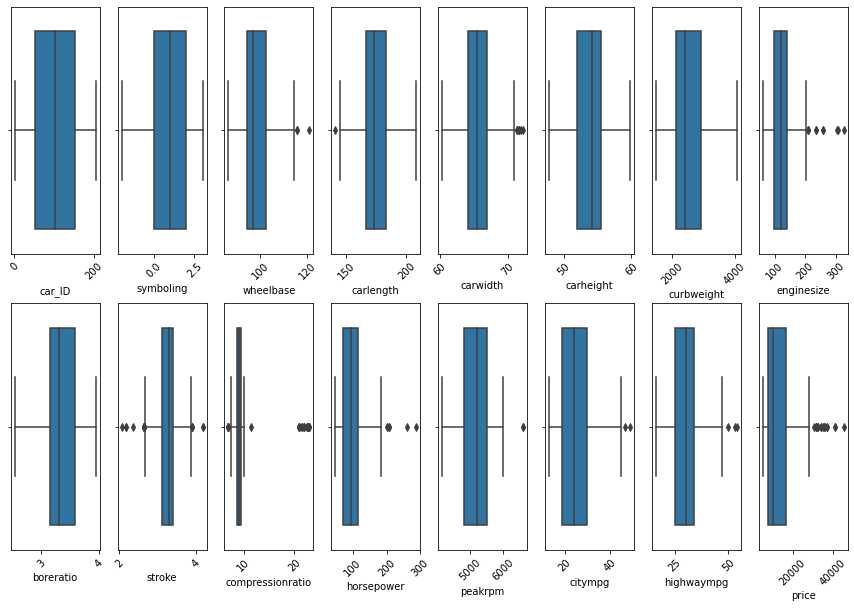

In [8]:
plt.figure(figsize=(15,10))
for i in enumerate(number_feature):
    plt.subplot(2, 8,i[0]+1)
    sns.boxplot(x=df[i[1]])
    plt.xticks(rotation=45)

## Observation 
1. There are existing outliers in numerical  features which include wheelbase, carwidth, enginsize, stroke, compressionration, horsepower, peakprm, citympg,  highwaympg and price.
1. There is no evidence to remove the outliers from the data . The data set is too small, so we are not removing or imputing outliers in data. 

In [9]:
# Splitting Car Name with car brand 
df['Car_Brand']=df['CarName'].str.split(' ').str[0]
print(list(df['Car_Brand'].drop_duplicates()))

['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen', 'volkswagen', 'vw', 'volvo']


Here, We observe that some of the typos in the company name.

In [10]:
# Replacing typo company name with proper company name
df['Car_Brand'].replace(to_replace=['maxda','nissan','porcshce', 'toyouta','vokswagen','vw'],
                       value=['mazda','Nissan','porsche','toyota','volkswagen','volkswagen'],
                       inplace=True)

In [11]:
# Verified changes are made to the  company name;
print(list(df['Car_Brand'].drop_duplicates()))

['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']


# 5 Exploratory Data Analysis

In [12]:
print(df.columns)
df.head()

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'Car_Brand'],
      dtype='object')


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_Brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


### Question1
What is the average price of cars by  car company?
### Solution
Here we are  computing the average price  for each brand and plotiing the average price for each brand using  bar graph.

- Bar plot is a graphical representation technique that is used to visualize categorical features in the data.

In [13]:
len(df['Car_Brand'].drop_duplicates())
company_price= df[['Car_Brand', 'price']].groupby('Car_Brand').mean()
company_price=company_price.reset_index()
company_price['price']=round(company_price['price'],2)

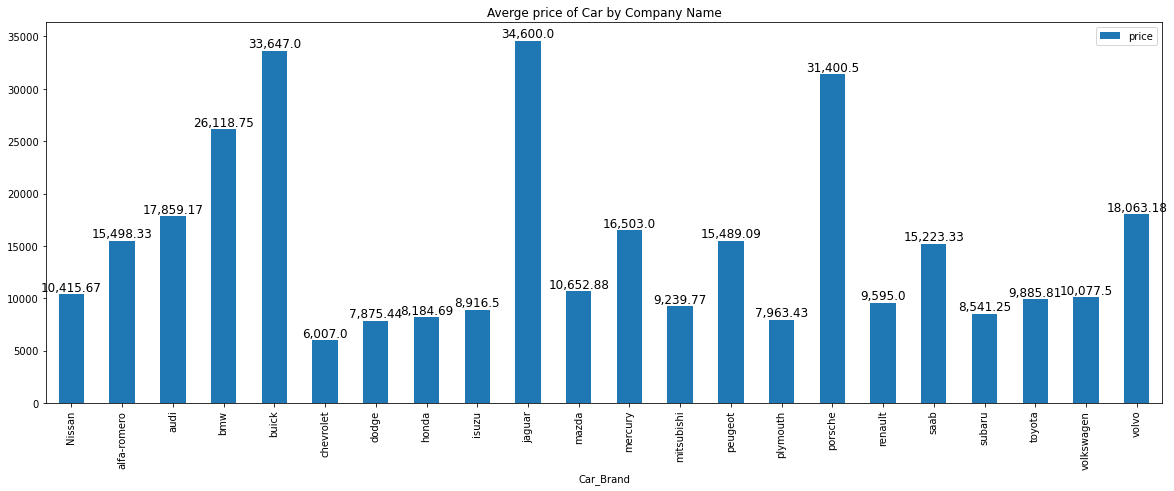

In [14]:
ax = company_price.plot(x='Car_Brand',figsize=(20,7 ),
                      kind='bar',
                      stacked=False,
                      title='Averge price of Car by Company Name'
                      )
for bar in ax.patches:
    bar_value = bar.get_height()
    text = f'{bar_value:,}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    ax.text(text_x, text_y, text, ha='center', va='bottom', size=12)
plt.show()

### Observation
The average price of Jaguar company cars is 34,600.0, it is the highest price among the all remaining company cars,followed by Buick and Porsche, whose average prices are 33,647.0 and 31,400.5 respectively.

### Question2
What is the distribution of  cars among American people?
### Solution
Here we are plotting the pie chart to show the distribution of brands of cars among U.S. people. 
- Pie chart is a type of graph that represents the data in the circular graph.

In [15]:
car_count_by_company=df[['Car_Brand']]
car_count_by_company=car_count_by_company.groupby('Car_Brand')['Car_Brand'].count().reset_index(name='counts')
company_name=list(car_count_by_company['Car_Brand'])
count=list(car_count_by_company['counts'])

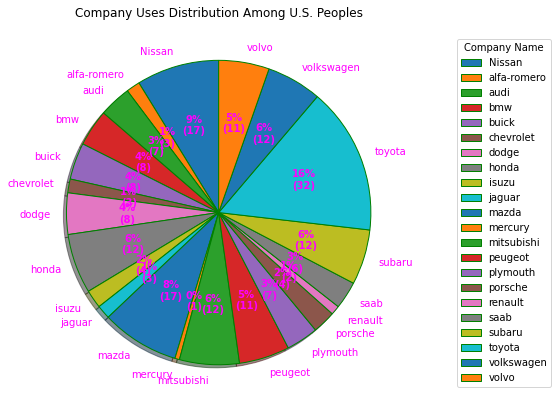

In [16]:
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.0f}%\n({:d})".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(count,
                                  autopct = lambda pct: func(pct, count),
                                  labels = company_name,
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta")
                                  )
 
# Adding legend
ax.legend(wedges, company_name,
          title ="Company Name",
          loc ="center",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 10, weight ="bold")
ax.set_title("Company Uses Distribution Among U.S. Peoples")
 
# show plot
plt.show()

### Observation
1. Most of the cars used by U.S customers are from Toyota company, which is 16%. 
1. Distribution of mitsubshi, honda and volkswagen cars is 6% among U.S.customers.  

### Question3
Which body is mostly used among U.S. customers?

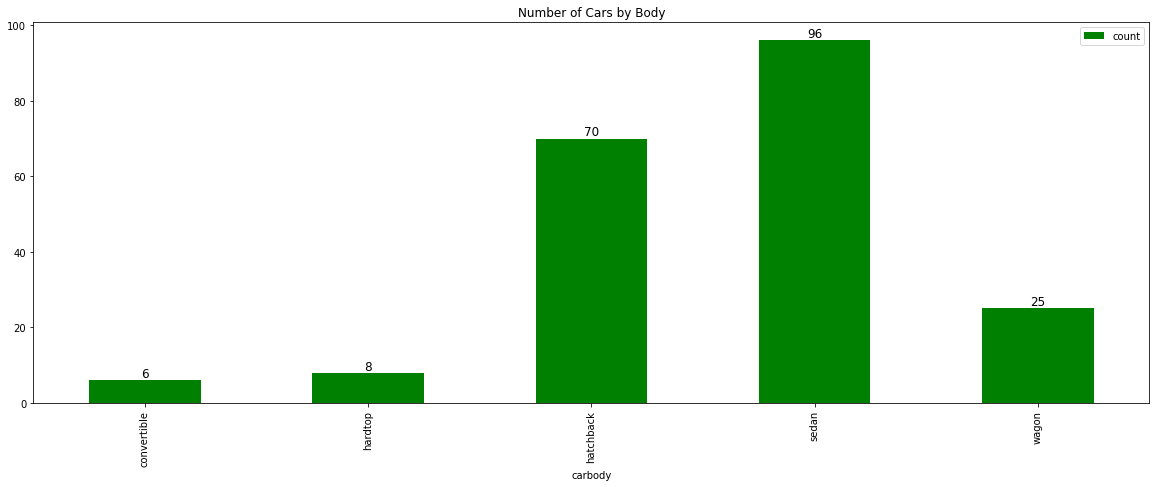

In [17]:
carbody= df[['carbody']]
carbody=carbody.groupby(['carbody'])['carbody'].count().reset_index(name='count')
ax=carbody.plot(x='carbody',figsize=(20,7 ),kind='bar',stacked=False,
                title='Number of Cars by Body',
                color='green')

for bar in ax.patches:
    bar_value = bar.get_height()
    text = f'{bar_value:,}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    ax.text(text_x, text_y, text, ha='center', va='bottom', size=12)
    
plt.show()

## Observation 
- 96 cars  used by U.S. customers are sedan body types, which is the highest among all the other body types. 

### Question4
Which fuel  system prefers U.S. customers?
### Solution
Here we are plotting a bar graph that represents the number of  cars vs fuel type.

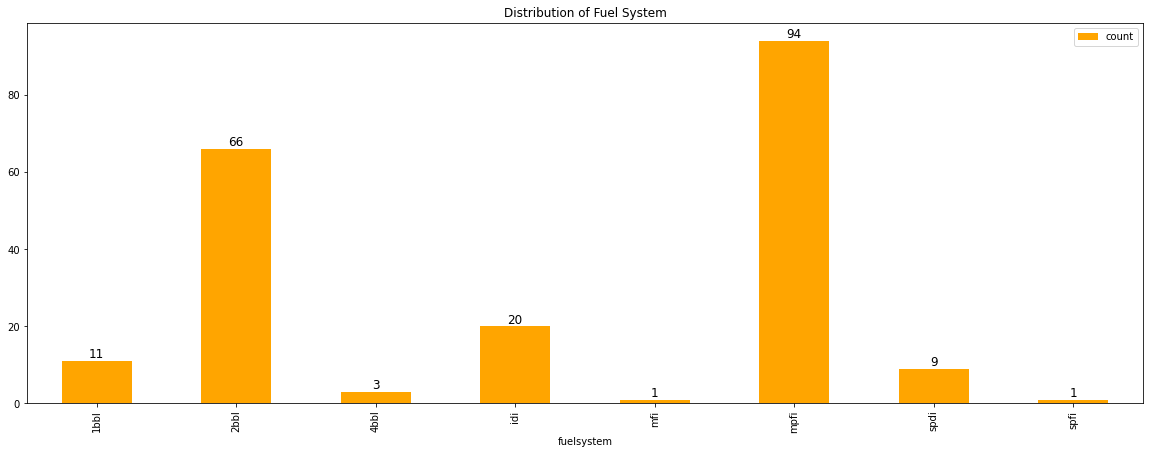

In [18]:
fuelsystem= df[['fuelsystem']]
fuelsystem=fuelsystem.groupby(['fuelsystem'])['fuelsystem'].count().reset_index(name='count')
ax=fuelsystem.plot(x='fuelsystem',figsize=(20,7 ),
        kind='bar',
        stacked=False,
        title='Distribution of Fuel System',
        color='orange')
for bar in ax.patches:
    bar_value = bar.get_height()
    text = f'{bar_value:,}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    ax.text(text_x, text_y, text, ha='center', va='bottom', 
          size=12)
plt.show()

### Observation 
Most vehicles are mpfi and 2bbl fuel type which are 96 and 66 respectively. There is lower penetration of spfi fuel type among types of the  cars. 

### Question5
What is the price distribution of cars?
### Solution:
The price of cars is continuous data types, so we are creating a distribution plot. 
- Distribution plots visually assess the distribution of sample data by comparing the empirical distribution of the data with the theoretical values expected from a specified distribution

C:\Users\modi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


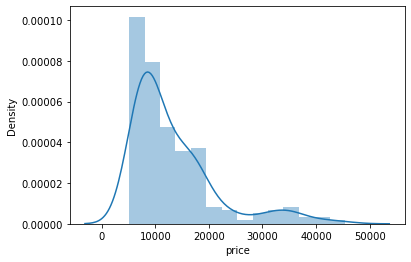

In [19]:
sns.distplot(df['price']);

In [20]:
print('Skewness : %f' % df['price'].skew())
print('Kurtosis: %f' % df['price'].kurt())

Skewness : 1.777678
Kurtosis: 3.051648


#### Skewness
*Skewness is a measure of symmetry, or more precisely, the lack of symmetry. Its is used to identyfy the distribution of data set is left or right side from centre.*

- **Approximetly Symmetric** : -0.5<Skewness<0.5
- **Moderately Skewed**      : -1<Skewness<1
- **Highly skewed**          :skewnees>1 or <-1

#### Kurtosis

*Kurtosis is a measure of the tailedness of a distribution.*

- **Leptokurtic**            : Kurtosis >3 (+)
- **Mesokurtic**             : Kurtosis =3(0)
- **Platykutic**             : Kurtosis<3(-ve)

### Observation:
1. The skewness value is 1.77. It is greater than 1 ,so the price is highly skewed.
1. The Kurtosis value is greater than 3, the graph is leptokurtic.
1. We need to transform data to create a linear regression model.

### Question6
Check the correlation for all continous features 
### Solution
Here we are plotting the correlation metrix for identifying the relation between continuous variables.
- A correlation matrix is a square matrix showing the correlation coefficients between two variables

<AxesSubplot:>

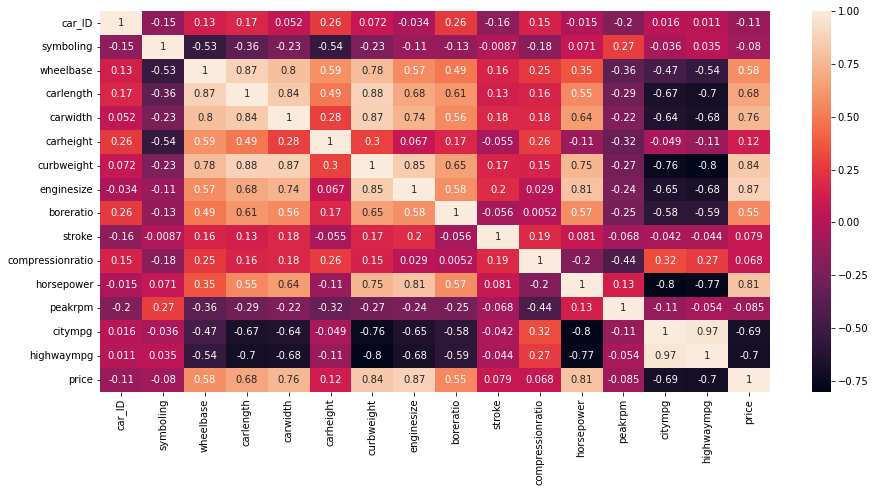

In [21]:
Numerical_feature= df[number_feature]
corrmat=Numerical_feature.corr()

f, ax=plt.subplots(figsize=(15,7))

sns.heatmap(corrmat,annot=True)

### Observation 
1. There is a high positive correlation between  wheelbase, carlenghth, carwidth,carweight, enginesize, boreratio and horsepowe with the price of the cars.
1. peakrpm, citympg and  highwaympg have negatively correlated with price of cars.
1. Car width is highly correlated with horsepower, boreratio, enginesize and curbweight. it represent multipcolinearity exist in the indepedent features. 
1. The assumption of linear regression is violated, so we can not use a linear regression model here. 

# 6 Model Development

- In this section we will develop a decision tree and random forest model. 
- Then we will analyze our results obtain and make our observation.
- For evaluation purpose, we will focus on  actual vs predicted graph, accuracy and r squared for each model.
- We will identfying the important feature for each model.

### Decision Trees

Decision tree is a supervised machine learning algorithm that is used for classification and regression problem. Decision tree is classified into two algorithms, which includes decision tree regressor and decision tree classification. Decision tree classification is used when the target variable is discrete or categorical. Decision tree regressor is used when our target variable is continuous.

## Randomforest
Random forest is an ensamble machine learning algorithm. It create multiple decision trees for different independent features, the final output is  average or model of all trees. The features are selected  with replacing method, it is nothing but boosting.

### Accuracy 
Accuracy is the degree of closeness between a measurement and its true value

### R-Squared
R-Squared is  how much variability explained by the model in targed variable.

##  6.1 Baseline Model Developement and Evaluation 

## 6.1.1Crate Decision Tree Algorithm

In [22]:
cat_feature=[]
for i in df.columns:
    if df[i].dtypes=='object':
        cat_feature.append(i)

In [23]:
for cat in cat_feature:
    unique_class=list(df[cat].drop_duplicates())
    len_unque=len(unique_class)
    change_class=[]
    for i in range(0, len_unque):
        change_class.append(i)
    df[cat].replace(unique_class,change_class, inplace =True)

In [24]:
df=df.drop(['car_ID','CarName'], axis=1)

In [25]:
y=df['price']
x=df.drop('price', axis=1)

In [26]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=43)
print('Shape of x_train:',x_train.shape)
print('shape of x_test:', x_test.shape)
print('Shaie of y train:', y_train.shape)
print('shape of y test:', y_test.shape)

Shape of x_train: (164, 24)
shape of x_test: (41, 24)
Shaie of y train: (164,)
shape of y test: (41,)


In [27]:
model=DecisionTreeRegressor(max_depth=5)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

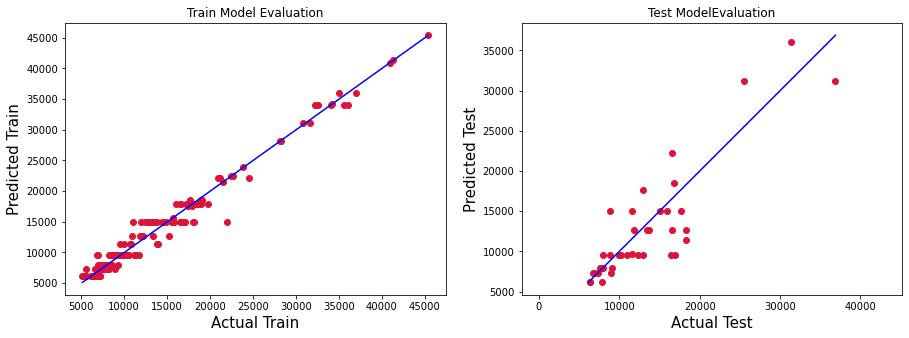

In [28]:

ax0.scatter(y_train, y_train_pred, c='crimson')
fig,(ax0, ax1) =plt.subplots(nrows=1, ncols=2,sharex=False,figsize=(15,5))

y_train_pred=model.predict(x_train)
p1=max(max(y_train),max(y_train_pred))
p2=min(min(y_train), min(y_train_pred))

ax0.plot([p1,p2],[p1, p2],'b-')
ax0.set_xlabel('Actual Train', fontsize=15)
ax0.set_ylabel('Predicted Train', fontsize=15)

plt.axis('equal')

y_test_pred=model.predict(x_test)

ax1.scatter(y_test, y_test_pred, c='crimson')

p3=max(max(y_test),max(y_test_pred))
p4=min(min(y_test), min(y_test_pred))

ax1.plot([p3,p4],[p3, p4],'b-')
ax1.set_xlabel('Actual Test', fontsize=15)
ax1.set_ylabel('Predicted Test', fontsize=15)
ax0.set_title('Train Model Evaluation')
ax1.set_title('Test ModelEvaluation')

plt.axis('equal')
plt.show()

## Observation
Model is overfitting, It is work correct on  train data set, when it apply on test data set, it is not working properly on test data set. So we are going to  use random forest technique. 

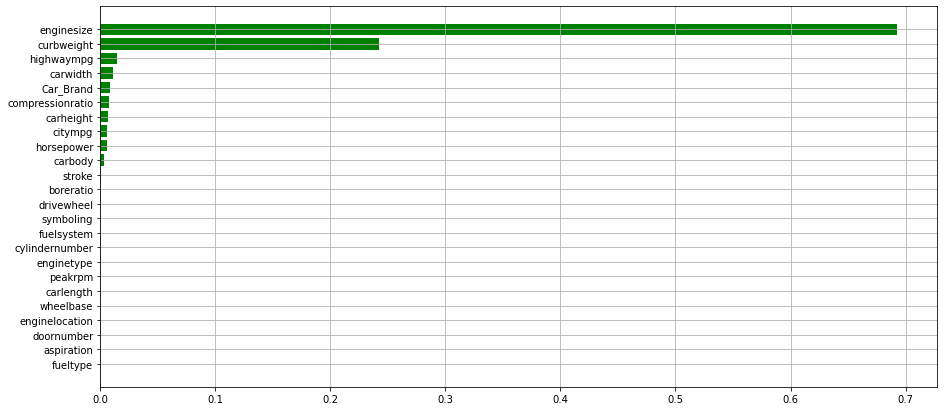

In [29]:
featur=x_train.columns 
importance =model.feature_importances_
indece= np.argsort(importance)
plt.figure(figsize=(15,7))
plt.barh(y=range(len(indece)),width=importance[indece], color='g', align='center')
plt.yticks(ticks=range(len(indece)),labels=[featur[i] for i in indece])
plt.grid(b=True)
plt.show()

In [30]:
r2_square= r2_score(y_true=y_train, y_pred=y_train_pred)
mspe_train= mean_absolute_percentage_error(y_true=y_train, y_pred=y_train_pred)
msper_test=mean_absolute_percentage_error(y_true=y_test, y_pred=y_test_pred)

In [31]:
print("Decision Tree Summary")
print(f'R2:{r2_square}' )
print(f'Accuracy for Train Data: {100-mspe_train*100}')
print(f'Accuracy for Test Data: {100-msper_test*100}')

Decision Tree Summary
R2:0.9755671691274505
Accuracy for Train Data: 91.92328293505823
Accuracy for Test Data: 83.93100278490334


## 6.1.2 Create Randomforest Algorithm

In [32]:
random_F_model=DecisionTreeRegressor().fit(X=x_train, y=y_train)
rdf_train_pred=random_F_model.predict(x_train)
rdf_test_pred= random_F_model.predict(x_test)

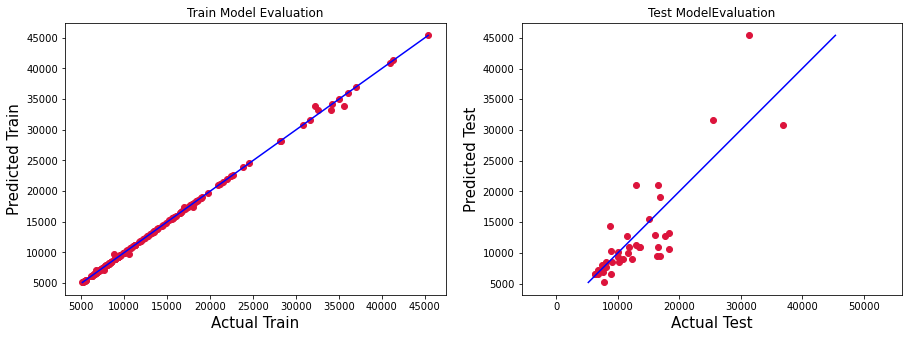

In [33]:
fig,(ax0, ax1) =plt.subplots(nrows=1, ncols=2,sharex=False,figsize=(15,5))
y_train_pred=model.predict(x_train)
ax0.scatter(y_train, rdf_train_pred, c='crimson')
p1=max(max(y_train),max(rdf_train_pred))
p2=min(min(y_train), min(rdf_train_pred))
ax0.plot([p1,p2],[p1, p2],'b-')
ax0.set_xlabel('Actual Train', fontsize=15)
ax0.set_ylabel('Predicted Train', fontsize=15)
plt.axis('equal')
ax1.scatter(y_test,rdf_test_pred, c='crimson')
p3=max(max(y_test),max(rdf_test_pred))
p4=min(min(y_test), min(rdf_test_pred))
ax1.plot([p3,p4],[p3, p4],'b-')
ax1.set_xlabel('Actual Test', fontsize=15)
ax1.set_ylabel('Predicted Test', fontsize=15)
ax0.set_title('Train Model Evaluation')
ax1.set_title('Test ModelEvaluation')
plt.axis('equal')
plt.show()

In [34]:
r2_square_rd= r2_score(y_true=y_train, y_pred=rdf_train_pred)
mspe_train_rd= mean_absolute_percentage_error(y_true=y_train, y_pred=rdf_train_pred)
msper_test_rd=mean_absolute_percentage_error(y_true=y_test, y_pred=rdf_test_pred)

In [35]:
print("Random Forest Summary")
print(f'R2:{r2_square_rd}' )
print(f'Accuracy for Train Data: {100-mspe_train_rd*100}')
print(f'Accuracy For for Test Data: {100-msper_test_rd*100}')

Random Forest Summary
R2:0.9991968794699977
Accuracy for Train Data: 99.6870296769565
Accuracy For for Test Data: 81.00168446163144


### Observation 
The accuracy of the model is increased in the trained model but it has declined in the test model, so we are going to parameter optimized technique. 

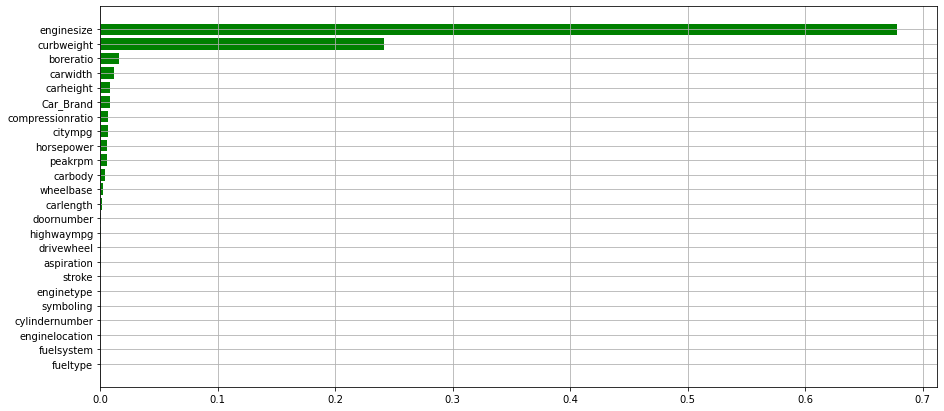

In [36]:
featur=x_train.columns 
importance =random_F_model.feature_importances_
indece= np.argsort(importance)
plt.figure(figsize=(15,7))
plt.barh(y=range(len(indece)),width=importance[indece], color='g', align='center')
plt.yticks(ticks=range(len(indece)),labels=[featur[i] for i in indece])
plt.grid(b=True)
plt.show()

# 6.2 Hyperparameter Optimized Model Development & Evaluation

- In this section, we will  develope random forest regressor using hyperparametric testing
- We will use RamizedSearcCV method for exuastic search over specifies parmetric value of the estimeter
- Below , we will apply grid search over following parameter
- max_depth
- Criterion
- n_estimator
- max_features

In [37]:
# Parameter for Gridsearch
param_dist = {"max_depth": range(2, 40),
              "n_estimators": range(50, 200, 20),
              'max_features': ['sqrt', 'log2', None]
             }

random_search = RandomizedSearchCV(RandomForestRegressor(),
                                   param_distributions = param_dist,
                                   n_iter = 50,
                                   n_jobs = -1)

In [38]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': range(2, 40),
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': range(50, 200, 20)})

In [39]:
random_search.best_params_

{'n_estimators': 170, 'max_features': 'log2', 'max_depth': 30}

In [40]:
rf_preds_new_train = random_search.predict(x_train)
rf_preds_new_test = random_search.predict(x_test)

In [41]:
rf_new_r2 = r2_score(y_true=y_train, y_pred=rf_preds_new_train)
rf_new_mape_train = mean_absolute_percentage_error(y_true=y_train, y_pred=rf_preds_new_train)
rf_new_mape_test = mean_absolute_percentage_error(y_true=y_test, y_pred=rf_preds_new_test)

In [42]:
print("RF OPTIMISED Regression summary")
print(f"TRAIN R2: {rf_new_r2}")
print(f"TRAIN ACCURACY: {100 - rf_new_mape_train * 100 }")
print(f"TEST ACCURAY: {100 - rf_new_mape_test * 100}")

RF OPTIMISED Regression summary
TRAIN R2: 0.9913455676390828
TRAIN ACCURACY: 96.2230430135081
TEST ACCURAY: 88.7466630015572


### Observation

Accuracy  on test data and train data is increazed, so we are considerd this is final model to solve business problem,

## Feature Importance

In [43]:
feat_imp_array =  random_search.best_estimator_.feature_importances_

In [44]:
feature_df = (pd.DataFrame((feat_imp_array*100), 
             index=x_train.columns, 
             columns=['Importance'])
.sort_values('Importance', ascending=True))

<AxesSubplot:>

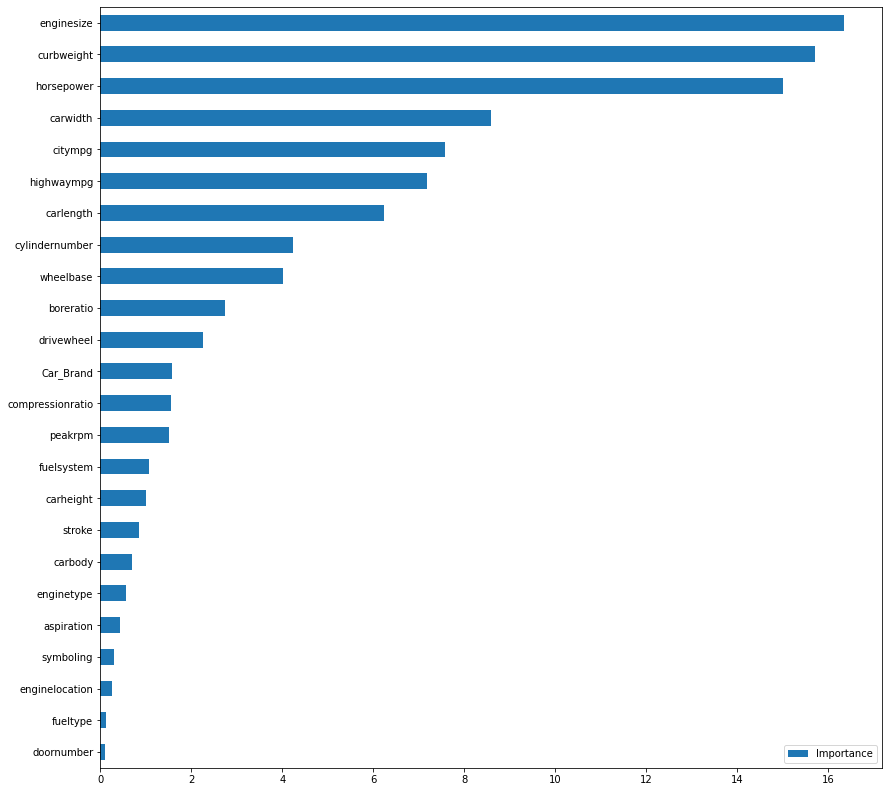

In [45]:
feature_df.plot.barh(figsize=(14, 14))

### Observation 
1. We can observe that hyperperotimized modes results have improved from baseline model results.
1. Now our model is generlized very well , i.e we are getting the results on test as train data.

## Problem Statement1
### Which Variables are significant in predication price of the cars?
## Solution:
###  We are giving solution for this problem from the above importane feature graph.
- Carwidth, enginsize, horsepower,citympg, highwaymmpg, carlength, wheelbase, cylinder number and drivewheel  are the most important features to changes the price of cars in the U.S. market. 

## Problem Statement2
### How significant variables describe the price of a car based on various market surveys.
## Solution
- We are ploting the correlation graph to check vary price of the car from all significant variables

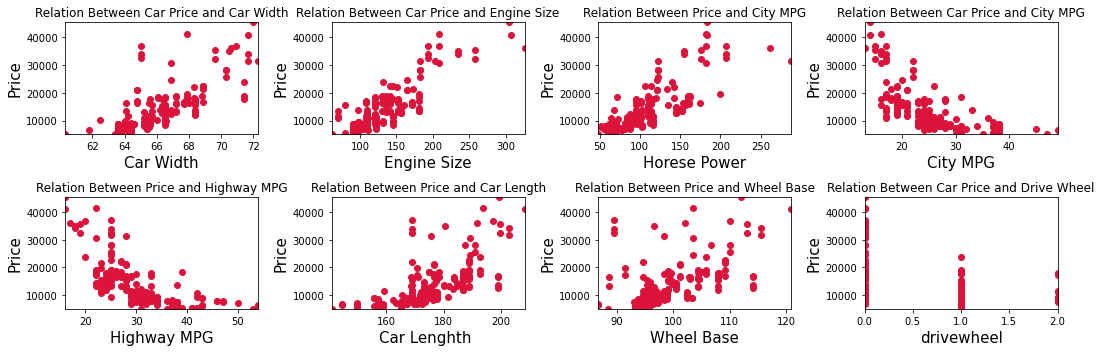

In [46]:
fig,((ax0, ax1, ax2, ax3), (ax4, ax5, ax6, ax7))=plt.subplots(nrows=2, ncols=4,sharex=False, sharey=False,figsize=(15,5))
ax0.scatter(df['carwidth'], df['price'], c='crimson')
ax0.set_xlim(min(df['carwidth']),max(df['carwidth']))
ax0.set_ylim(min(df['price']),max(df['price']))
ax0.set_xlabel('Car Width', fontsize=15)
ax0.set_ylabel('Price', fontsize=15)
ax0.set_title('Relation Between Car Price and Car Width')
ax1.scatter(df['enginesize'], df['price'], c='crimson')
ax1.set_xlim(min(df['enginesize']),max(df['enginesize']))
ax1.set_ylim(min(df['price']),max(df['price']))
ax1.set_xlabel('Engine Size', fontsize=15)
ax1.set_ylabel('Price', fontsize=15)
ax1.set_title('Relation Between Car Price and Engine Size')
ax2.scatter(df['horsepower'], df['price'], c='crimson')
ax2.set_xlim(min(df['horsepower']),max(df['horsepower']))
ax2.set_ylim(min(df['price']),max(df['price']))
ax2.set_xlabel('Horese Power', fontsize=15)
ax2.set_ylabel('Price', fontsize=15)
ax2.set_title('Relation Between Price and City MPG')
ax3.scatter(df['citympg'], df['price'], c='crimson')
ax3.set_xlim(min(df['citympg']),max(df['citympg']))
ax3.set_ylim(min(df['price']),max(df['price']))
ax3.set_xlabel('City MPG', fontsize=15)
ax3.set_ylabel('Price', fontsize=15)
ax3.set_title('Relation Between Car Price and City MPG')
ax4.scatter(df['highwaympg'], df['price'], c='crimson')
ax4.set_xlim(min(df['highwaympg']),max(df['highwaympg']))
ax4.set_ylim(min(df['price']),max(df['price']))
ax4.set_xlabel('Highway MPG', fontsize=15)
ax4.set_ylabel('Price', fontsize=15)
ax4.set_title('Relation Between Price and Highway MPG')
ax5.scatter(df['carlength'], df['price'], c='crimson')
ax5.set_xlim(min(df['carlength']),max(df['carlength']))
ax5.set_ylim(min(df['price']),max(df['price']))
ax5.set_xlabel('Car Lenghth ', fontsize=15)
ax5.set_ylabel('Price', fontsize=15)
ax5.set_title('Relation Between Price and Car Length')
ax6.scatter(df['wheelbase'], df['price'], c='crimson')
ax6.set_xlim(min(df['wheelbase']),max(df['wheelbase']))
ax6.set_ylim(min(df['price']),max(df['price']))
ax6.set_xlabel('Wheel Base', fontsize=15)
ax6.set_ylabel('Price', fontsize=15)
ax6.set_title('Relation Between Price and Wheel Base')
ax7.scatter(df['drivewheel'], df['price'], c='crimson')
ax7.set_xlim(min(df['drivewheel']),max(df['drivewheel']))
ax7.set_ylim(min(df['price']),max(df['price']))
ax7.set_xlabel('drivewheel', fontsize=15)
ax7.set_ylabel('Price', fontsize=15)
ax7.set_title('Relation Between Car Price and Drive Wheel')
fig.tight_layout()
plt.show()

## Observation
1. Increase in the car width the price of the  car going to increase, there exist  positive correlation.
1. Engine size is strongly positive correlation with price. There is increase in  engine size then price is increasing continously. We have strong evidance that engine size is positively impact on increase in price of price of  car.
1. There is exist strong relation between  horse power and price of the car. We can see that there are lower points after 150 Hp, so there are maximum vehicle  below 150 horsepower. 
1. There exist negative relation between city MPG and price. City MPG is increasing then price of vehicle is downfall
1. Highway MPG and price are negeatively correlation with each other. 
1. Increase in  car length then  price of car increasing. 
1. Rising relationship exist in between wheel base and price of car. 

## Problem Statement3
### Car company management looking for how exactly the price vary with the independent variable?
## Solution 
1. Ther feature veriables car width, engine size horse power, car length and wheel base are positively impacting to boot the price of cars. Managment should be increase those fatures to get the miximum price  of the vehicle in the market.  
2. While increase in above features, the management should be  focus on city mpg and  highway pg features.  The MPG of the car increased the price of the vehicle  downfall. We should be keep the minimum maximum. Some of cars in the data are sellimg at lower price but there are delivering higher city and higway MPG. But where we compare other features horse power, engine size, care weight and car lengh  with city mpg, there exist negitive relation. 
3. Whenever we are increaing car width, car length and horspower city mpg and high way mpg will decrease. These factors are declining the  mpg  of the car  but declining mpg of the cars increase the price of cars. 